✅ Accuracy Score: 0.9

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        36
           1       0.00      0.00      0.00         4

    accuracy                           0.90        40
   macro avg       0.45      0.50      0.47        40
weighted avg       0.81      0.90      0.85        40


📉 Confusion Matrix:
 [[36  0]
 [ 4  0]]


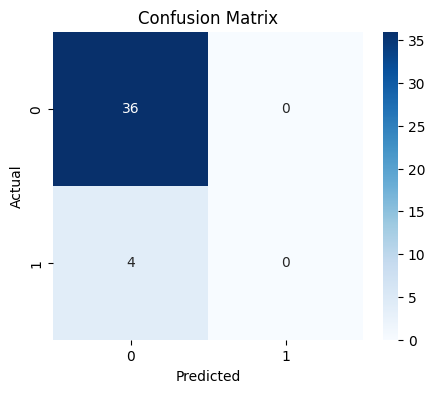

/tmp/ipython-input-1-964420094.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices], palette="viridis")


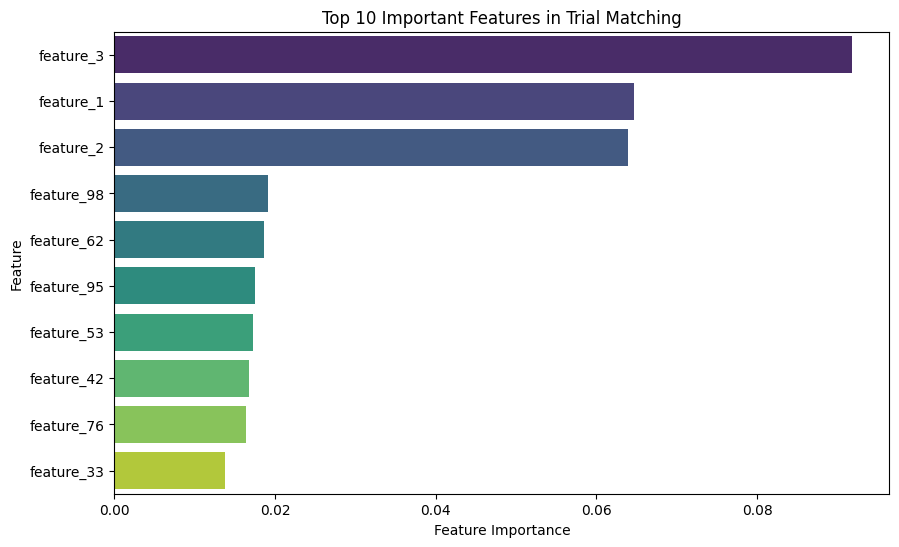

In [1]:
# ✅ Clinical Trial Patient Matching System - Google Colab Version

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Generate Synthetic Patient Dataset (300 patients × 100 features)
np.random.seed(42)
X = pd.DataFrame(np.random.randn(300, 100), columns=[f'feature_{i+1}' for i in range(100)])

# Step 3: Define Matching Criteria Logic
# Patients with feature_1 + feature_2 + feature_3 > 1.5 are labeled as "matched" (1)
y = ((X['feature_1'] + X['feature_2'] + X['feature_3']) > 1.5).astype(int)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=40, random_state=42)

# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[-10:][::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[X.columns[i] for i in indices], palette="viridis")
plt.title("Top 10 Important Features in Trial Matching")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()
